# Skin Type Model
This model is the model that used to classify user's skin type and have an output of multi-class from 3 possible class (oily,normal,dry)

## Import Libraries, Mobilenet, and Env File

In [1]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing Env File
from dotenv import load_dotenv

load_dotenv()
datasets_path = os.getenv('DATASET_PATH_TYPE_2')
# datasets_path = os.getenv('DATASET_PATH_TYPE_3')

In [ ]:
# Importing RestNet With ImagNet Weight Without The Top Layer
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
# Membekukan semua lapisan dari model MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Fine-tuning: Membuka beberapa lapisan terakhir dari MobileNetV2
for layer in base_model.layers[-5:]:  # Mengatur lebih banyak lapisan terakhir dapat dilatih
    layer.trainable = True

## Importing Model (If Exist)

In [2]:
from tensorflow.keras.models import load_model

# load model from .h5 file
model = load_model('models/skin_type_model_2.keras')

c:\Users\albia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Import Dataset

In [5]:
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import tensorflow as tf

class SkinTypeDataset(tfds.core.GeneratorBasedBuilder):
    """DatasetBuilder for skin type detection."""
    VERSION = tfds.core.Version('1.0.0')
    MANUAL_DOWNLOAD_INSTRUCTIONS = "Please ensure the skin type dataset is downloaded and located at the right path (look at env file)"

    def _info(self):
        return tfds.core.DatasetInfo(
            builder=self,
            description=("Dataset for skin type classification with 3 labels: oily, normal, dry"),
            features=tfds.features.FeaturesDict({
                'image': tfds.features.Image(shape=(224, 224, 3)),
                'label': tfds.features.Tensor(shape=(3,), dtype=tf.float32),
            }),
            supervised_keys=('image', 'label'),
        )

    def _split_generators(self, dl_manager):
        path = dl_manager.manual_dir
        # Read all images and labels
        all_data = []
        for category in ['oily', 'normal', 'dry']:
            category_path = os.path.join(path, category)
            for filename in os.listdir(category_path):
                all_data.append((filename, category))
        
        # Create DataFrame
        df = pd.DataFrame(all_data, columns=['filename', 'label'])
        
        # Split data into train, val, and test
        train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
        train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 0.25 of train for validation
        
        return {
            'train': self._generate_examples(train_df, path),
            'val': self._generate_examples(val_df, path),
            'test': self._generate_examples(test_df, path),
        }

    def _generate_examples(self, dataframe, base_path):
        label_map = {
            'oily': [1, 0, 0],
            'normal': [0, 1, 0],
            'dry': [0, 0, 1]
        }
        # Load images and their labels
        for _, row in dataframe.iterrows():
            image_path = os.path.join(base_path, row['label'], row['filename'])
            image = tf.io.read_file(image_path)  # Read image file
            image = tf.io.decode_image(image, channels=3)  # Decode image to tensor
            image = tf.image.resize(image, (224, 224))  # Resize image
            image = tf.cast(image, tf.uint8)  # Convert to uint8
            label = tf.cast(label_map[row['label']], tf.float32)  # Cast to float32
            yield row['filename'], {  # Use filename as the unique key
                'image': image.numpy(),
                'label': label.numpy(),
            }

# Use the updated dataset class
builder = SkinTypeDataset(data_dir=datasets_path)
builder.download_and_prepare()

## Checking Dataset

In [6]:
# Memuat dataset dalam bentuk builder untuk melakukan cek
ds_train = builder.as_dataset(split='train')
ds_val = builder.as_dataset(split='val')
ds_test = builder.as_dataset(split='test')

In [7]:
# Filter dan tampilkan label dengan nilai [0, 0, 1]
for i, example in enumerate(ds_train):
    label = example['label'].numpy()  # Ambil label sebagai numpy array
    if (label == [0, 1, 0]).all():    
        print(f"Label {i + 1}: {label}")

Label 4: [0. 1. 0.]
Label 5: [0. 1. 0.]
Label 6: [0. 1. 0.]
Label 8: [0. 1. 0.]
Label 9: [0. 1. 0.]
Label 10: [0. 1. 0.]
Label 15: [0. 1. 0.]
Label 16: [0. 1. 0.]
Label 20: [0. 1. 0.]
Label 22: [0. 1. 0.]
Label 23: [0. 1. 0.]
Label 27: [0. 1. 0.]
Label 31: [0. 1. 0.]
Label 33: [0. 1. 0.]
Label 35: [0. 1. 0.]
Label 39: [0. 1. 0.]
Label 42: [0. 1. 0.]
Label 45: [0. 1. 0.]
Label 47: [0. 1. 0.]
Label 48: [0. 1. 0.]
Label 49: [0. 1. 0.]
Label 50: [0. 1. 0.]
Label 56: [0. 1. 0.]
Label 58: [0. 1. 0.]
Label 60: [0. 1. 0.]
Label 61: [0. 1. 0.]
Label 62: [0. 1. 0.]
Label 64: [0. 1. 0.]
Label 65: [0. 1. 0.]
Label 72: [0. 1. 0.]
Label 74: [0. 1. 0.]
Label 75: [0. 1. 0.]
Label 76: [0. 1. 0.]
Label 80: [0. 1. 0.]
Label 82: [0. 1. 0.]
Label 85: [0. 1. 0.]
Label 94: [0. 1. 0.]
Label 99: [0. 1. 0.]
Label 100: [0. 1. 0.]
Label 102: [0. 1. 0.]
Label 103: [0. 1. 0.]
Label 104: [0. 1. 0.]
Label 106: [0. 1. 0.]
Label 108: [0. 1. 0.]
Label 111: [0. 1. 0.]
Label 115: [0. 1. 0.]
Label 116: [0. 1. 0.]
Label 118

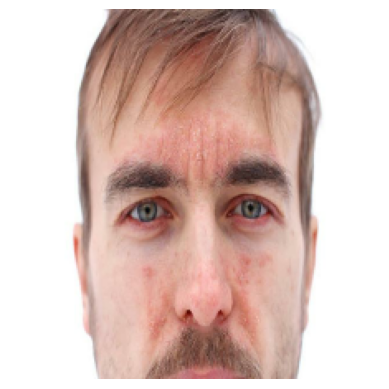

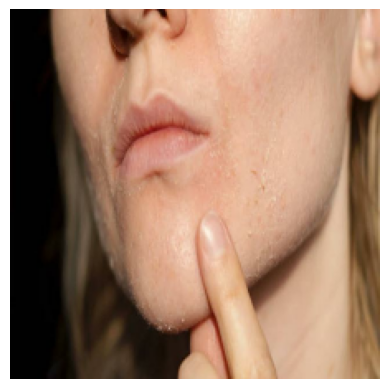

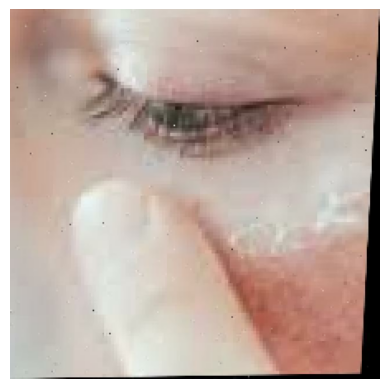

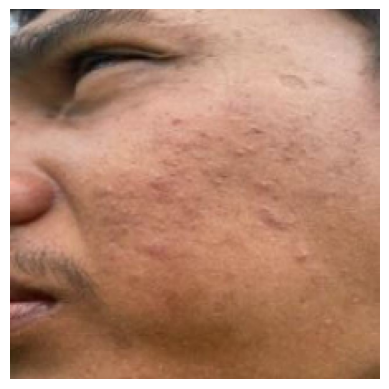

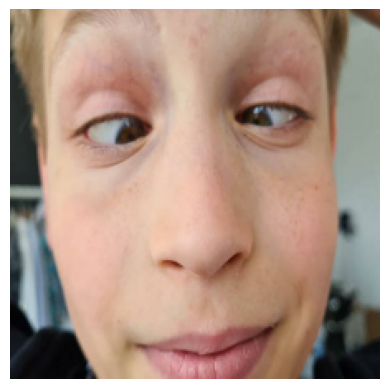

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Fungsi untuk menampilkan gambar
def show_image(image):
    # Konversi gambar tensor ke numpy array dan tampilkan dengan matplotlib
    image = image.numpy()  # Ubah tensor menjadi numpy array
    plt.imshow(image)
    plt.axis('off')  # Nonaktifkan axis
    plt.show()

# Fungsi untuk menampilkan beberapa gambar
def show_images_from_dataset(dataset, num_images=5):
    for i, data in enumerate(dataset.take(num_images)):  # Ambil beberapa gambar pertama dari dataset
        image = data['image']
        # Tampilkan gambar
        show_image(image)

# Menampilkan gambar pertama dari ds_train
show_images_from_dataset(ds_train, num_images=5)

## Loading The Dataset, Data Augmentation and Feature Extraction


In [25]:
# Memuat dataset yang sudah diproses
ds_train = tfds.load('skin_type_dataset', split='train', data_dir=datasets_path)
ds_val = tfds.load('skin_type_dataset', split='val', data_dir=datasets_path)
ds_test = tfds.load('skin_type_dataset', split='test', data_dir=datasets_path)

In [26]:
def augment_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    
    # Menambahkan random zoom
    scale = tf.random.uniform(shape=[], minval=0.8, maxval=1.2, dtype=tf.float32)
    new_height = tf.cast(scale * 224, tf.int32)
    new_width = tf.cast(scale * 224, tf.int32)
    image = tf.image.resize(image, (new_height, new_width))
    image = tf.image.resize_with_crop_or_pad(image, 224, 224)  # Mengembalikan ke ukuran 224x224
    
    return image, label

In [27]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def extract_glcm_features(image):
    # Konversi gambar ke skala abu-abu jika belum
    if len(image.shape) == 3:
        image = tf.image.rgb_to_grayscale(image)
        image = tf.squeeze(image)  # Hapus dimensi channel
    
    # Konversi tipe data gambar ke uint8
    image = tf.cast(image * 255.0, tf.uint8)  # Skala dari [0, 1] ke [0, 255]
    
    # Hitung GLCM
    glcm = graycomatrix(image.numpy(), [1], [0], 256, symmetric=True, normed=True)
    
    # Ekstraksi fitur GLCM
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    return np.array([contrast, dissimilarity, homogeneity, energy, correlation])


In [28]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
num_features = 5

# Function to preprocess image and label
def preprocess(data):
    image = data['image']
    label = data['label']
    return image, label

# Function to extract GLCM features
def glcm_reprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    glcm_features = tf.py_function(func=extract_glcm_features, inp=[image], Tout=tf.float32)
    glcm_features.set_shape([num_features])  # Ensuring shape [5]
    return glcm_features, label

# Preprocess datasets
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val = ds_val.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Apply data augmentation
ds_train = ds_train.map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val = ds_val.map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Extract GLCM features
ds_train_features = ds_train.map(glcm_reprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val_features = ds_val.map(glcm_reprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test_features = ds_test.map(glcm_reprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Combine image dataset and GLCM dataset
train_dataset = tf.data.Dataset.zip(((ds_train.map(lambda x, y: x), 
                                      ds_train_features.map(lambda x, y: x)), 
                                     ds_train.map(lambda x, y: y)))

val_dataset = tf.data.Dataset.zip(((ds_val.map(lambda x, y: x), 
                                    ds_val_features.map(lambda x, y: x)), 
                                   ds_val.map(lambda x, y: y)))

test_dataset = tf.data.Dataset.zip(((ds_test.map(lambda x, y: x), 
                                     ds_test_features.map(lambda x, y: x)), 
                                    ds_test.map(lambda x, y: y)))

# Batch and prefetch datasets
train_dataset = train_dataset.batch(16).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(16).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(16).prefetch(tf.data.experimental.AUTOTUNE)


In [13]:
ds_train_features

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [14]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

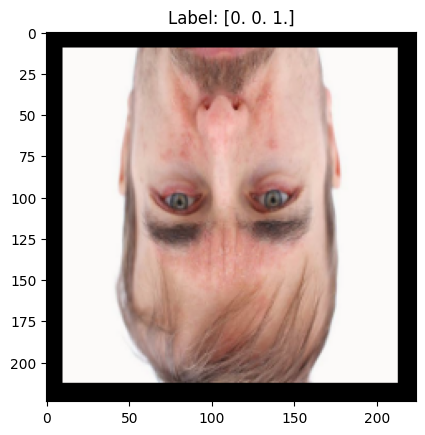

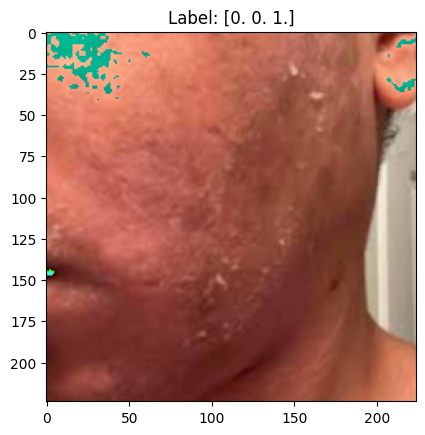

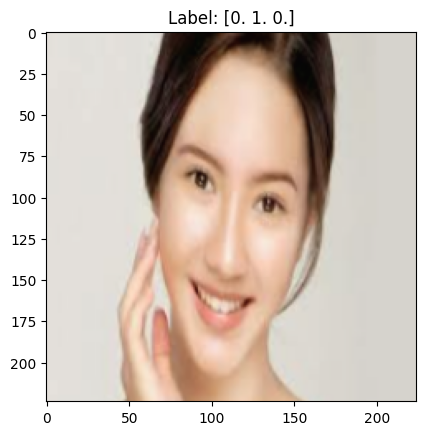

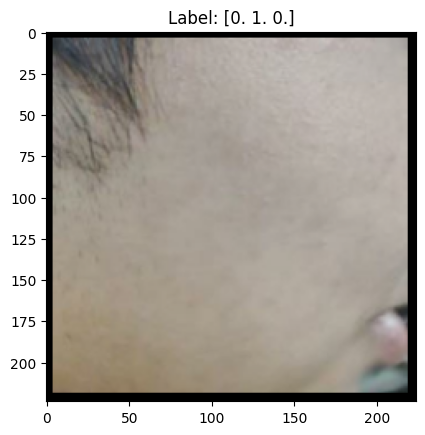

In [15]:
import matplotlib.pyplot as plt

for image, label in ds_train.take(4):  # Ambil batch pertama
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.title(f"Label: {label[0]}")
    plt.show()

In [16]:
for glcm_features, label_ in ds_train_features.take(1):
    print("GLCM Features:", glcm_features.numpy(), "\n Label: ", label[0])

GLCM Features: [[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [5.9662439e+02 2.4861867e+00 9.8854727e-01 8.7846345e-01 9.5760250e-01]
 [5.2069989e+02 2.0419602e+00 9.9199241e-01 8.2035363e-01 9.7490352e-01]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [7.4789264e+02 3.1591527e+00 9.8445630e-01 8.5433829e-01 9.5462495e-01]
 [3.0327185e+02 1.1957279e+00 9.9525553e-01 9.6802855e-01 9.1980481e-01]
 [1.2760428e+02 5.2516419e-01 9.9769789e-01 9.9511945e-01 7.3262155e-01]
 [5.0247537e+02 1.9704916e+00 9.9227268e-01 7.8298479e-01 9.7962540e-01]
 [5.5454535e+02 2.1746876e+00 9.9147195e-01 9.0823114e-01 9.4882905e-01]
 [4.8945789e+02 1.9194427e+00 9.9247289e-01 7.6071751e-01 9.8181117e-01]
 [5.0247537e+02 1.9704916e+00 9.9227268e-01 7.8298479e-01 9.7962540e-01]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.9074852e+01 8.7143660e-02 9.9947

In [17]:
# Hitung jumlah data dalam ds_train
num_samples = sum(1 for _ in ds_train_features)
# num_samples = sum(1 for _ in ds_train.unbatch())

print(f"Jumlah feature dan label dalam ds_train_features: {num_samples}")

Jumlah feature dan label dalam ds_train_features: 48


## Creating The Model

In [29]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Bagian untuk gambar
image_input = layers.Input(shape=(224, 224, 3))
x1 = base_model(image_input)
x1 = GlobalAveragePooling2D()(x1)

# Model untuk fitur GLCM
glcm_input = layers.Input(shape=(5,))
x2 = Dense(128, kernel_regularizer=l2(0.01))(glcm_input)
x2 = BatchNormalization()(x2)
x2 = ReLU()(x2)
x2 = Dropout(0.5)(x2)

# Menggabungkan kedua bagian
x = layers.concatenate([x1, x2])  # Menggabungkan fitur dari gambar dan GLCM
x = Dense(128, kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax', kernel_regularizer=l2(0.01))(x)   # Menggunakan softmax untuk multi-class classification

# Membuat model akhir
model = Model(inputs=[image_input, glcm_input], outputs=outputs)

# Menyesuaikan optimizer dan learning rate 
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9) 
# Compiling the model 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Show Model Architecture
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │        768 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_3[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[1][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 2176)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │    278,656 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 3)         │        387 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,868,547 (91.05 MB)

 Trainable params: 280,323 (1.07 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

In [ ]:
for image, label in ds_train.take(1):
    print(image.shape, label.shape)  

(16, 224, 224, 3) (16, 3)


In [ ]:
for glcm_features, label in ds_train_features.take(1):
    print(glcm_features.shape, label.shape)  

(16, 5) (16, 3)


## Callbacks

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callback untuk menghentikan pelatihan jika validasi loss tidak membaik
early_stopping = EarlyStopping(
    monitor='val_loss',                  
    patience=5,                         
    restore_best_weights=True,           
    verbose=1                            
)

# Callback untuk mengurangi learning rate jika validasi loss stagnan
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',                
    factor=0.5,                         
    patience=3,                         
    verbose=1                           
)

## Train Model

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 586ms/step - accuracy: 0.4030 - loss: 4.0082 - val_accuracy: 0.5490 - val_loss: 3.5560 - learning_rate: 0.0010
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 564ms/step - accuracy: 0.5977 - loss: 3.4421 - val_accuracy: 0.6196 - val_loss: 3.3736 - learning_rate: 0.0010
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 553ms/step - accuracy: 0.6573 - loss: 3.2944 - val_accuracy: 0.6745 - val_loss: 3.1780 - learning_rate: 0.0010
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step - accuracy: 0.6753 - loss: 3.1497 - val_accuracy: 0.7216 - val_loss: 3.0281 - learning_rate: 0.0010
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 552ms/step - accuracy: 0.6979 - loss: 3.0721 - val_accuracy: 0.7255 - val_loss: 2.9480 - learning_rate: 0.0010
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 540ms/step - accuracy: 0.7062 - loss: 3.0469 - val_accuracy: 0.7490 - val_loss: 2.8999 - learning_rate: 0.0010
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 534ms/step - accuracy: 0.7160 - loss: 2.

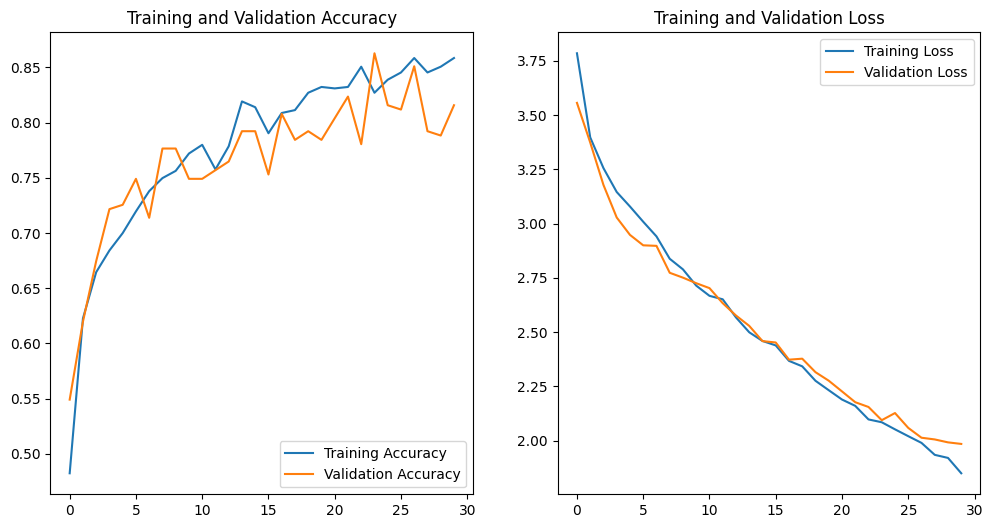

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step - accuracy: 0.8505 - loss: 1.8009
Testing Loss: 1.8240779638290405, Testing Accuracy: 0.8549019694328308


In [32]:
# class_weight = {0: 0.6 , 1: 1.2 , 2: 0.6}  # Sesuaikan bobot berdasarkan kinerja kelas

# Melatih model dan mencatat hasil pelatihan dalam objek `history`
history = model.fit(
    train_dataset,  # Batch size sesuai kebutuhan
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# Menampilkan metrik dengan matplotlib
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(accuracy))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluasi model pada data testing
loss, accuracy = model.evaluate(test_dataset)
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')


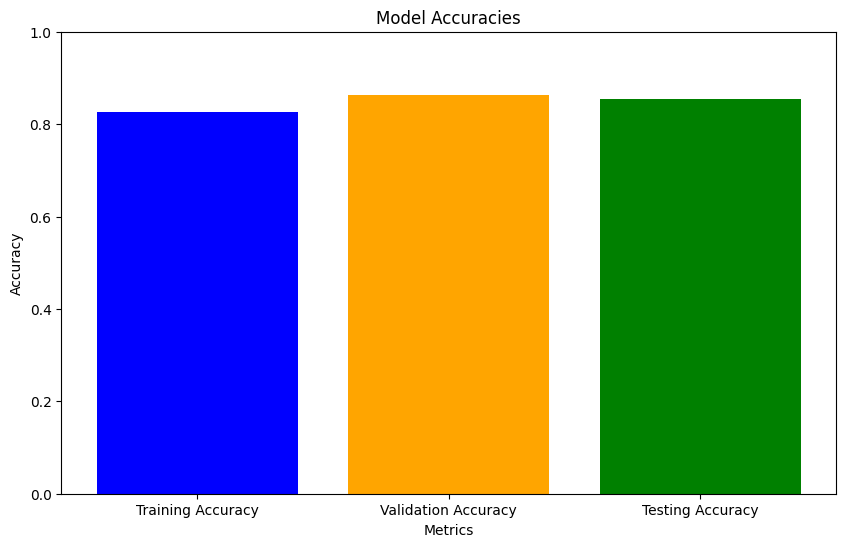

In [33]:
# Ambil nilai akurasi pada epoch terbaik
best_epoch = np.argmax(history.history['val_accuracy'])

train_accuracy = history.history['accuracy'][best_epoch] 
val_accuracy = history.history['val_accuracy'][best_epoch]

# Akurasi data testing (sudah didapat dari evaluasi model sebelumnya)
test_accuracy = accuracy

# Buat bar chart
labels = ['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
accuracies = [train_accuracy, val_accuracy, test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Atur batas y dari 0 sampai 1
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 483ms/step


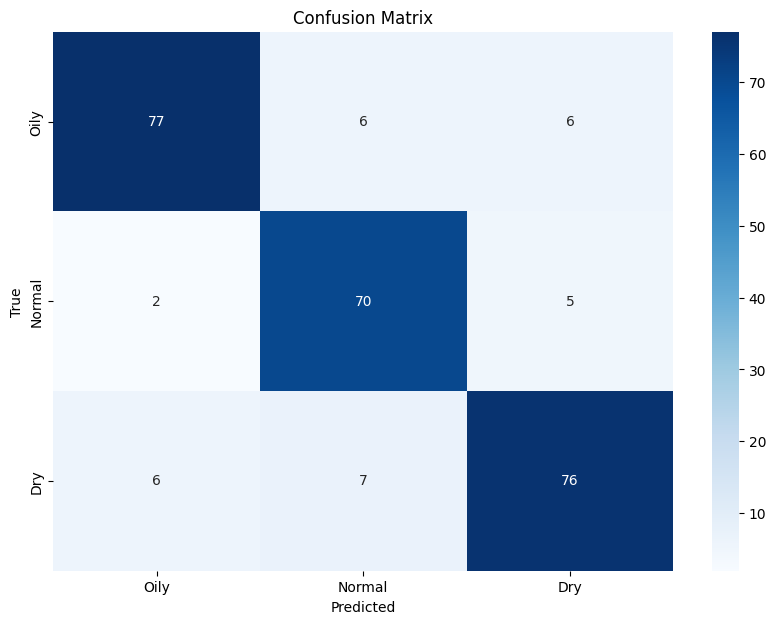

In [ ]:
# Membuat prediksi
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mendapatkan label aktual
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_true_classes = np.argmax(y_true, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Oily', 'Normal', 'Dry'], yticklabels=['Oily', 'Normal', 'Dry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
print(classification_report(y_true_classes, y_pred_classes, target_names=['Oily', 'Normal', 'Dry']))

In [37]:
# Saving the model in .h5 format
model.save('models/skin_type_model.h5')

In [38]:
import tensorflow as tf

# Load model dari file .keras
model = tf.keras.models.load_model('models/skin_type_model.keras')

# Buat converter untuk mengonversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open('models/skin_type_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\albia\AppData\Local\Temp\tmpbil8nsfv\assets


INFO:tensorflow:Assets written to: C:\Users\albia\AppData\Local\Temp\tmpbil8nsfv\assets


Saved artifact at 'C:\Users\albia\AppData\Local\Temp\tmpbil8nsfv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3'), TensorSpec(shape=(None, 5), dtype=tf.float32, name='input_layer_4')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2128690298960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772809552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772810320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772810512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772808976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772809360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772811280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772812432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2128772812816: TensorSpec(shape=(), dtype=tf.resource, name=None)

## Training Lanjutan (Rawan Overfitting)

Epoch 1/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 581ms/step - accuracy: 0.8804 - loss: 1.8412 - val_accuracy: 0.8235 - val_loss: 1.9573 - learning_rate: 0.0010
Epoch 2/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 526ms/step - accuracy: 0.8333 - loss: 1.8251 - val_accuracy: 0.8118 - val_loss: 1.9133 - learning_rate: 0.0010
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 637ms/step - accuracy: 0.8785 - loss: 1.7771 - val_accuracy: 0.8196 - val_loss: 1.8977 - learning_rate: 0.0010
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 536ms/step - accuracy: 0.8483 - loss: 1.7860 - val_accuracy: 0.8118 - val_loss: 1.8545 - learning_rate: 0.0010
Epoch 5/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 510ms/step - accuracy: 0.8584 - loss: 1.7262 - val_accuracy: 0.8353 - val_loss: 1.8120 - learning_rate: 0.0010
Epoch 6/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 515ms/step - accuracy: 0.8664 - loss: 1.7005 - val_accuracy: 0.8118 - val_loss: 1.7925 - learning_rate: 0.0010
Epoch 7/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 512ms/step - accuracy: 0.8766 - loss: 1.

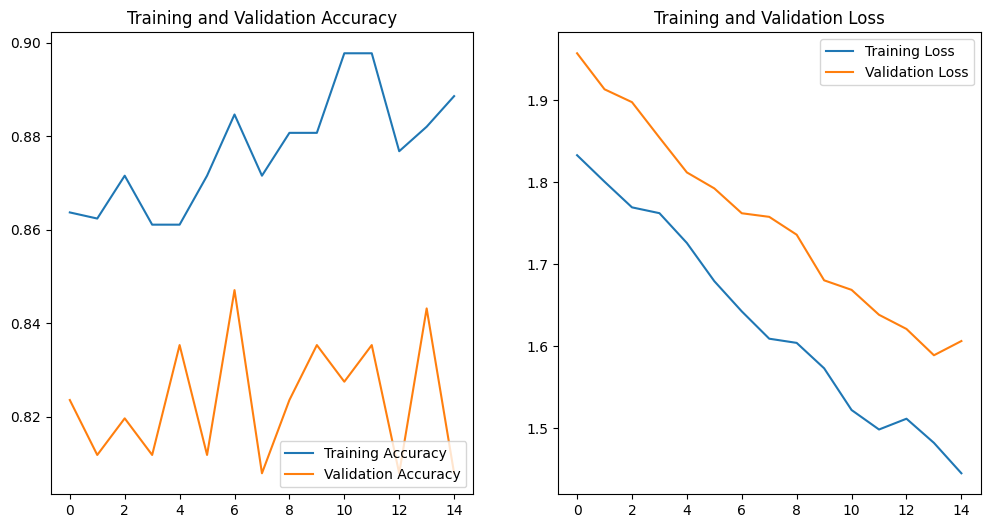

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.8409 - loss: 1.5391
Testing Loss: 1.5413423776626587, Testing Accuracy: 0.843137264251709


In [39]:
# class_weight = {0: 0.6 , 1: 1.2 , 2: 0.6}  # Sesuaikan bobot berdasarkan kinerja kelas

# Melatih model dan mencatat hasil pelatihan dalam objek `history`
history = model.fit(
    train_dataset,  # Batch size sesuai kebutuhan
    validation_data=val_dataset,
    epochs=15,
    callbacks=[early_stopping, lr_scheduler]
)

# Menampilkan metrik dengan matplotlib
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(accuracy))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluasi model pada data testing
loss, accuracy = model.evaluate(test_dataset)
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')


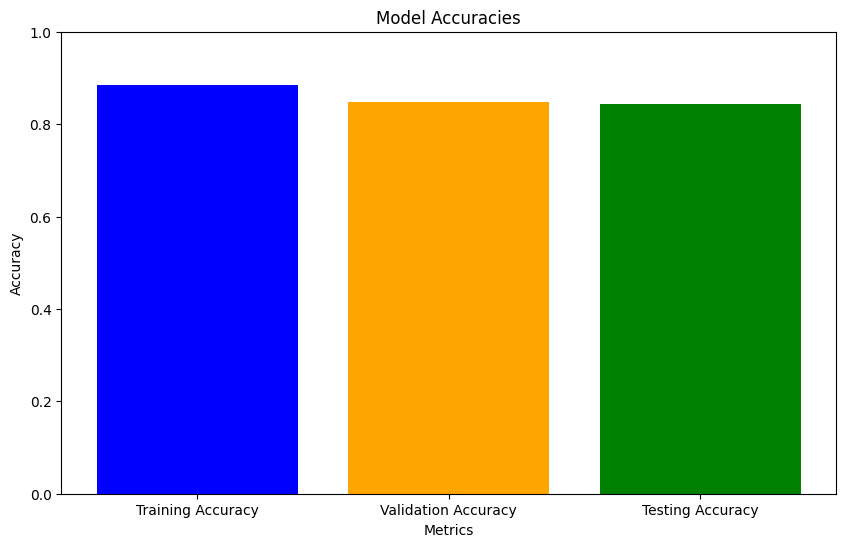

In [40]:
# Ambil nilai akurasi pada epoch terbaik
best_epoch = np.argmax(history.history['val_accuracy'])

train_accuracy = history.history['accuracy'][best_epoch] 
val_accuracy = history.history['val_accuracy'][best_epoch]

# Akurasi data testing (sudah didapat dari evaluasi model sebelumnya)
test_accuracy = accuracy

# Buat bar chart
labels = ['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
accuracies = [train_accuracy, val_accuracy, test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Atur batas y dari 0 sampai 1
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step


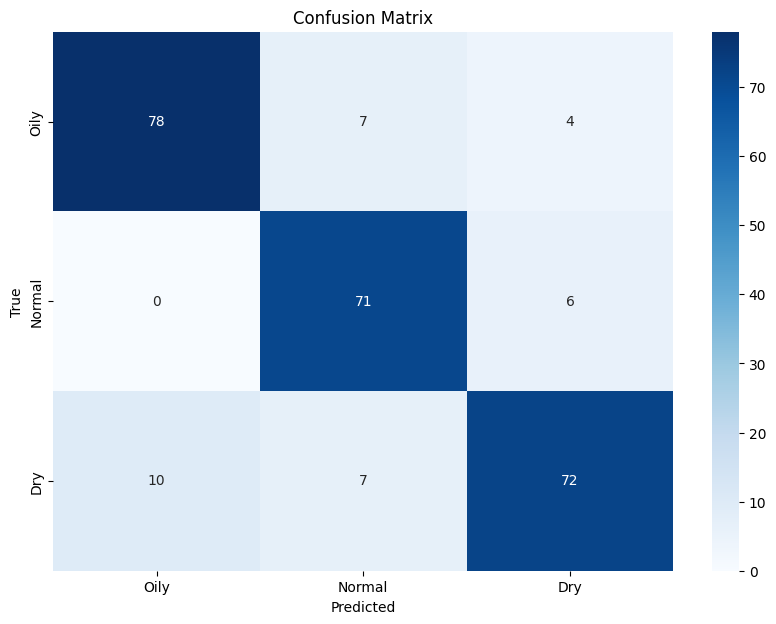

              precision    recall  f1-score   support

        Oily       0.89      0.88      0.88        89
      Normal       0.84      0.92      0.88        77
         Dry       0.88      0.81      0.84        89

    accuracy                           0.87       255
   macro avg       0.87      0.87      0.87       255
weighted avg       0.87      0.87      0.87       255



In [42]:
# Membuat prediksi
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mendapatkan label aktual
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_true_classes = np.argmax(y_true, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Oily', 'Normal', 'Dry'], yticklabels=['Oily', 'Normal', 'Dry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
print(classification_report(y_true_classes, y_pred_classes, target_names=['Oily', 'Normal', 'Dry']))